In [ ]:
#
# Scalling Analysis for the Flat Scan Sampling multi core
# João Inácio, Apr. 16th, 2021
# 

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, linregress

In [54]:
# System and simulation information

dim = "2D"
lattice = "SS"
NN = 4

L = 16
N_atm = 1 * L ** 2

max_E = (1 / 2) * NN * N_atm
max_M = N_atm
NE = int(1 + (max_E / 2))
NM = N_atm + 1

REP = 10 ** 5
skip = N_atm
shuffle = 10 ** 7

q_max = (NM + 1) // 2 - 2
if NM % 2 == 0:
    q_max = NM // 2 - 3

n_cores = np.array([2, 16, 32, 64, 128]) - 1


In [55]:
# Initialization of data arrays

new_wall_time = np.zeros(len(n_cores))
new_q_time_E = np.zeros(len(n_cores))

old_wall_time = np.zeros(len(n_cores))
old_q_time_E = np.zeros(len(n_cores))


In [56]:
# Get the data from the new implementation

k = 0
for n in n_cores:
    if n == 1:
        file_name = "".join(("./data_cluster/new_version/", str(int(n)), "_JDOS_FSS_Ising_", 
                             dim, "_", lattice, "_L", str(L), "_REP_1E", str(int(np.log10(REP))), 
                             "_skip_", str(skip)))
        n = 0
    else:
    
        file_name = "".join(("./data_cluster/new_version/", str(int(n + 1)), "_JDOS_FSS_Ising_", 
                             dim, "_", lattice, "_L", str(L), "_REP_1E", str(int(np.log10(REP))), 
                             "_skip_", str(skip), "_shuffle_", str(int(np.log10(shuffle)))))

    with open(file_name + "_data.txt", 'r') as data_file:
        header = data_file.readline().strip("\n")

        q_time_E = np.zeros(q_max)
        for i in range(0, q_max):
            line = data_file.readline().strip("\n").split(" ")
            q_time_E[i] = float(line[4])

        new_wall_time[k] = float(data_file.readline().strip("\n"))
        new_q_time_E[k] = np.sum(q_time_E)

    print(n + 1)
    print("Mean Wall time: {:.5f} seconds".format(new_wall_time[k]))
    print("Mean q_time / E: {:.5f} seconds".format(new_q_time_E[k]))
    print("------------------------------------")

    k += 1


1
Mean Wall time: 299461.00000 seconds
Mean q_time / E: 2477.40481 seconds
------------------------------------
16
Mean Wall time: 35002.10000 seconds
Mean q_time / E: 327.92289 seconds
------------------------------------
32
Mean Wall time: 22257.50000 seconds
Mean q_time / E: 222.26350 seconds
------------------------------------
64
Mean Wall time: 15509.60000 seconds
Mean q_time / E: 169.62326 seconds
------------------------------------
128
Mean Wall time: 12794.40000 seconds
Mean q_time / E: 145.76382 seconds
------------------------------------


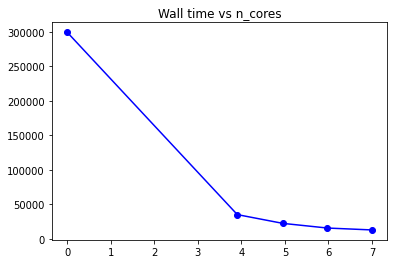

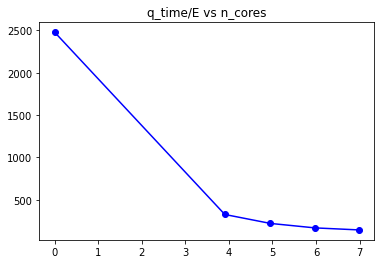

In [13]:
# Plot Wall time and q_time/E

# Wall time
plt.figure(1)
plt.plot(np.log2(n_cores), new_wall_time, '-ob')
plt.title("Wall time vs n_cores")
    
# q_time/E
plt.figure(2)
plt.plot(np.log2(n_cores), new_q_time_E, '-ob')
plt.title("q_time/E vs n_cores")

plt.show()


Fit with p=0.9587887418697474 and r2=0.9997132640989838


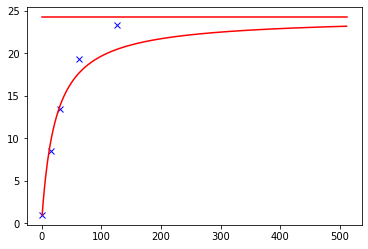

In [77]:
# Speedup

speedup = np.zeros(len(n_cores))

for i in range(len(n_cores)):
    speedup[i] = new_wall_time[0] / new_wall_time[i]

y = 1 / speedup
x = 1 / n_cores

p, intercept, r_value, p_value, std_err = linregress(x, y)
print(f"Fit with p={p} and r2={r_value**2}")

# Amdahl's Law

cores_amd = np.arange(1, 512, 1)
speedup_theo = 1 / (1 - p + (p / cores_amd))

plt.figure(1)
plt.plot(n_cores, speedup, 'xb')
plt.plot(cores_amd, speedup_theo, '-r')
plt.plot(cores_amd, np.ones(len(cores_amd)) / (1 - p), '-r')

plt.show()
